load 30m poloniex data

In [2]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import numpy as np
from numpy import random
import pandas as pd
import glob
from tqdm import tqdm_notebook as tqdm
import os, json

# self-made 
from Download_data import Poloniex

In [3]:
# load data

#importlib.reload(Poloniex)
test = Poloniex()
data_loaded = test.api(args={'start':'2017-01-01 00:00:00', #start date
                       'end':'2018-03-22 00:00:00',  # end date
                       'period':'30'})
# BTC, ETH, XRP (Ripple), LTC (Litecoin)

https://poloniex.com/public?command=returnChartData&period=1800&start=1483225200&end=1521673200&currencyPair=USDT_BTC
https://poloniex.com/public?command=returnChartData&period=1800&start=1483225200&end=1521673200&currencyPair=USDT_ETH
https://poloniex.com/public?command=returnChartData&period=1800&start=1483225200&end=1521673200&currencyPair=USDT_XRP
https://poloniex.com/public?command=returnChartData&period=1800&start=1483225200&end=1521673200&currencyPair=USDT_LTC
Data loaded.


In [4]:
dfs=[]
for infile in glob.glob('history/*.csv'):
    df = pd.read_csv(infile)
    
    # date
    df.index=pd.to_datetime(df.date*1e9)
    del df['date']
    # just the cols from jiang 2017
    df = df[['close','high','low','open','volume','quoteVolume']]
    df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [5]:
# sort by time lengths
dfs.sort(key=lambda x:len(x), reverse=True)
[(df.name,df.index[0]) for df in dfs]

[('BTC', Timestamp('2016-12-31 23:00:00', freq='30T')),
 ('ETH', Timestamp('2016-12-31 23:00:00', freq='30T')),
 ('LTC', Timestamp('2016-12-31 23:00:00', freq='30T')),
 ('XRP', Timestamp('2016-12-31 23:00:00', freq='30T'))]

In [6]:
# # insert a fake one, the price of one bitcoin in bitcoin = 1
# df=dfs[0].copy()
# df[:]=1
# df.name='BTCBTC'
# dfs.insert(0,df)
dfs[0].head()

,close,high,low,open,volume,quoteVolume
date,,,,,,
2016-12-31 23:00:00,965.000000,965.000000,962.860000,964.000000,3687.031926,3.824598
2016-12-31 23:30:00,966.173684,966.615000,963.000000,964.000000,3178.871809,3.293368
2017-01-01 00:00:00,966.149998,966.150000,961.700000,965.000001,11900.677348,12.348251
2017-01-01 00:30:00,964.133267,965.668127,962.879999,962.880000,2738.659872,2.842460
2017-01-01 01:00:00,965.855011,965.855012,964.133268,964.133268,1032.527297,1.069114


In [7]:
dfs[0].name

'BTC'

In [8]:
# reindex
mi = dfs[0].index.copy()
for i in range(len(dfs)):
    name = dfs[i].name
    dfs[i]=dfs[i].reindex(mi, method='pad')
    dfs[i][np.isnan(dfs[i])]=0
    dfs[i].name = name

In [9]:
# concat
df = pd.concat(dfs, axis=1, keys=[df.name for df in dfs], names=['Pair','Price'])
df.head()

Pair                        BTC                                      \
Price                     close        high         low        open   
date                                                                  
2016-12-31 23:00:00  965.000000  965.000000  962.860000  964.000000   
2016-12-31 23:30:00  966.173684  966.615000  963.000000  964.000000   
2017-01-01 00:00:00  966.149998  966.150000  961.700000  965.000001   
2017-01-01 00:30:00  964.133267  965.668127  962.879999  962.880000   
2017-01-01 01:00:00  965.855011  965.855012  964.133268  964.133268   

Pair                                                ETH                      \
Price                      volume quoteVolume     close      high       low   
date                                                                          
2016-12-31 23:00:00   3687.031926    3.824598  7.980005  8.030000  7.980000   
2016-12-31 23:30:00   3178.871809    3.293368  8.008506  8.038314  8.002000   
2017-01-01 00:00:00  11900.677348   12.348251  8.184481  8.232000  8.044822   
2017-01-01 00:30:00   2738.659872    2.842460  8.229053  8.242144  8.177586   
2017-01-01 01:00:00   1032.527297    1.069114  8.242144  8.242144  8.213986   

Pair                              ...            LTC                        \
Price                    open     ...            low      open      volume   
date                              ...                                        
2016-12-31 23:00:00  7.980000     ...       4.341458  4.341458    0.000000   
2016-12-31 23:30:00  8.030000     ...       4.346551  4.346551   14.047210   
2017-01-01 00:00:00  8.044822     ...       4.335165  4.349505   92.139866   
2017-01-01 00:30:00  8.177586     ...       4.395621  4.395621  585.349240   
2017-01-01 01:00:00  8.216482     ...       4.413020  4.413020    0.000000   

Pair                                  XRP                                \
Price               quoteVolume     close      high       low      open   
date                                                                      
2016-12-31 23:00:00    0.000000  0.006511  0.006511  0.006486  0.006486   
2016-12-31 23:30:00    3.229594  0.006486  0.006506  0.006484  0.006506   
2017-01-01 00:00:00   21.197991  0.006487  0.006487  0.006482  0.006482   
2017-01-01 00:30:00  131.855746  0.006487  0.006487  0.006487  0.006487   
2017-01-01 01:00:00    0.000000  0.006498  0.006498  0.006481  0.006481   

Pair                                         
Price                   volume  quoteVolume  
date                                         
2016-12-31 23:00:00   6.339470   976.828853  
2016-12-31 23:30:00   0.009873     1.522276  
2017-01-01 00:00:00  10.177061  1569.505205  
2017-01-01 00:30:00   0.000000     0.000000  
2017-01-01 01:00:00  15.481315  2386.927410  

[5 rows x 24 columns]

In [10]:
# fill in na's
df = df.fillna(method="pad")

# replace rest
df.replace(np.nan, 0, inplace=True)
# df.unstack()
df=df.astype(np.float32)
df.head()

Pair                        BTC                                      \
Price                     close        high         low        open   
date                                                                  
2016-12-31 23:00:00  965.000000  965.000000  962.859985  964.000000   
2016-12-31 23:30:00  966.173706  966.614990  963.000000  964.000000   
2017-01-01 00:00:00  966.150024  966.150024  961.700012  965.000000   
2017-01-01 00:30:00  964.133240  965.668152  962.880005  962.880005   
2017-01-01 01:00:00  965.854980  965.855042  964.133240  964.133240   

Pair                                                ETH                      \
Price                      volume quoteVolume     close      high       low   
date                                                                          
2016-12-31 23:00:00   3687.031982    3.824598  7.980005  8.030000  7.980000   
2016-12-31 23:30:00   3178.871826    3.293368  8.008506  8.038314  8.002000   
2017-01-01 00:00:00  11900.677734   12.348251  8.184482  8.232000  8.044822   
2017-01-01 00:30:00   2738.659912    2.842460  8.229053  8.242145  8.177586   
2017-01-01 01:00:00   1032.527344    1.069114  8.242145  8.242145  8.213986   

Pair                              ...            LTC                        \
Price                    open     ...            low      open      volume   
date                              ...                                        
2016-12-31 23:00:00  7.980000     ...       4.341458  4.341458    0.000000   
2016-12-31 23:30:00  8.030000     ...       4.346551  4.346551   14.047211   
2017-01-01 00:00:00  8.044822     ...       4.335165  4.349505   92.139870   
2017-01-01 00:30:00  8.177586     ...       4.395621  4.395621  585.349243   
2017-01-01 01:00:00  8.216482     ...       4.413020  4.413020    0.000000   

Pair                                  XRP                                \
Price               quoteVolume     close      high       low      open   
date                                                                      
2016-12-31 23:00:00    0.000000  0.006511  0.006511  0.006486  0.006486   
2016-12-31 23:30:00    3.229594  0.006486  0.006506  0.006484  0.006506   
2017-01-01 00:00:00   21.197990  0.006487  0.006487  0.006482  0.006482   
2017-01-01 00:30:00  131.855743  0.006487  0.006487  0.006487  0.006487   
2017-01-01 01:00:00    0.000000  0.006498  0.006498  0.006481  0.006481   

Pair                                         
Price                   volume  quoteVolume  
date                                         
2016-12-31 23:00:00   6.339470   976.828857  
2016-12-31 23:30:00   0.009873     1.522276  
2017-01-01 00:00:00  10.177060  1569.505249  
2017-01-01 00:30:00   0.000000     0.000000  
2017-01-01 01:00:00  15.481316  2386.927490  

[5 rows x 24 columns]

In [11]:
# check stats
assert np.isfinite(df.as_matrix()).all()
df.describe()

Pair            BTC                                                          \
Price         close          high           low          open        volume   
count  21361.000000  21361.000000  21361.000000  21361.000000  2.136100e+04   
mean    5162.140137   5198.034668   5122.864258   5162.032715  8.948810e+05   
std     4503.589355   4543.180176   4460.268555   4504.041504  1.334846e+06   
min      757.000000    765.000000    751.000000    756.770020  0.000000e+00   
25%     1321.355713   1324.771484   1318.490601   1321.300049  1.754889e+05   
50%     3430.000000   3443.500000   3414.899902   3429.828613  4.837689e+05   
75%     8210.000000   8253.040039   8169.673828   8210.498047  1.063951e+06   
max    19820.000000  19903.439453  19775.000000  19820.000000  3.098853e+07   

Pair                          ETH                                            \
Price   quoteVolume         close          high           low          open   
count  21361.000000  21361.000000  21361.000000  21361.000000  21361.000000   
mean     185.440689    342.935760    345.549103    340.071014    342.926361   
std      232.107346    322.075500    324.714539    319.125122    322.083588   
min        0.000000      7.980005      8.030000      7.980000      7.980000   
25%       56.814976     52.450001     52.680481     52.256939     52.488998   
50%      117.235771    290.429871    292.224854    288.649506    290.501007   
75%      223.935226    449.864319    452.675598    445.000000    449.000092   
max     4005.920898   1422.469971   1424.000000   1406.149048   1418.699951   

Pair       ...                LTC                                            \
Price      ...                low          open        volume   quoteVolume   
count      ...       21361.000000  21361.000000  2.136100e+04  21361.000000   
mean       ...          74.287834     75.003311  1.073314e+05   1823.098511   
std        ...          79.649506     80.522438  2.181525e+05   3339.078125   
min        ...           3.550000      3.608955  0.000000e+00      0.000000   
25%        ...          13.170000     13.251000  9.167619e+03    208.041397   
50%        ...          46.240761     46.551250  4.303927e+04    715.317017   
75%        ...          90.963676     91.849998  1.175932e+05   2019.791748   
max        ...         365.694275    367.799988  8.627328e+06  69764.195312   

Pair            XRP                                                          \
Price         close          high           low          open        volume   
count  21361.000000  21361.000000  21361.000000  21361.000000  2.136100e+04   
mean       0.377315      0.381816      0.372495      0.377323  1.855929e+05   
std        0.509292      0.516695      0.501476      0.509383  5.064560e+05   
min        0.005315      0.005337      0.005300      0.005315  0.000000e+00   
25%        0.035623      0.035990      0.035296      0.035675  7.738397e+03   
50%        0.207000      0.208850      0.205000      0.207000  4.486097e+04   
75%        0.290100      0.294000      0.286704      0.290000  1.429190e+05   
max        3.272106      3.283381      3.210000      3.277786  1.148187e+07   

Pair                 
Price   quoteVolume  
count  2.136100e+04  
mean   4.658690e+05  
std    9.418032e+05  
min    0.000000e+00  
25%    6.435600e+04  
50%    1.994147e+05  
75%    4.996099e+05  
max    2.511472e+07  

[8 rows x 24 columns]

In [12]:
# split
test_split=0.15
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 3203 train#: 18158 test_frac: 0.1499461635691213 cutoff_time: 2018-01-14 05:30:00


In [13]:
# save
df_train.to_hdf('df_train.hf',key='train', mode='w', append=False)
df_test.to_hdf('df_test.hf',key='test', mode='a', append=False)
df_train.head()

Pair                        BTC                                      \
Price                     close        high         low        open   
date                                                                  
2016-12-31 23:00:00  965.000000  965.000000  962.859985  964.000000   
2016-12-31 23:30:00  966.173706  966.614990  963.000000  964.000000   
2017-01-01 00:00:00  966.150024  966.150024  961.700012  965.000000   
2017-01-01 00:30:00  964.133240  965.668152  962.880005  962.880005   
2017-01-01 01:00:00  965.854980  965.855042  964.133240  964.133240   

Pair                                                ETH                      \
Price                      volume quoteVolume     close      high       low   
date                                                                          
2016-12-31 23:00:00   3687.031982    3.824598  7.980005  8.030000  7.980000   
2016-12-31 23:30:00   3178.871826    3.293368  8.008506  8.038314  8.002000   
2017-01-01 00:00:00  11900.677734   12.348251  8.184482  8.232000  8.044822   
2017-01-01 00:30:00   2738.659912    2.842460  8.229053  8.242145  8.177586   
2017-01-01 01:00:00   1032.527344    1.069114  8.242145  8.242145  8.213986   

Pair                              ...            LTC                        \
Price                    open     ...            low      open      volume   
date                              ...                                        
2016-12-31 23:00:00  7.980000     ...       4.341458  4.341458    0.000000   
2016-12-31 23:30:00  8.030000     ...       4.346551  4.346551   14.047211   
2017-01-01 00:00:00  8.044822     ...       4.335165  4.349505   92.139870   
2017-01-01 00:30:00  8.177586     ...       4.395621  4.395621  585.349243   
2017-01-01 01:00:00  8.216482     ...       4.413020  4.413020    0.000000   

Pair                                  XRP                                \
Price               quoteVolume     close      high       low      open   
date                                                                      
2016-12-31 23:00:00    0.000000  0.006511  0.006511  0.006486  0.006486   
2016-12-31 23:30:00    3.229594  0.006486  0.006506  0.006484  0.006506   
2017-01-01 00:00:00   21.197990  0.006487  0.006487  0.006482  0.006482   
2017-01-01 00:30:00  131.855743  0.006487  0.006487  0.006487  0.006487   
2017-01-01 01:00:00    0.000000  0.006498  0.006498  0.006481  0.006481   

Pair                                         
Price                   volume  quoteVolume  
date                                         
2016-12-31 23:00:00   6.339470   976.828857  
2016-12-31 23:30:00   0.009873     1.522276  
2017-01-01 00:00:00  10.177060  1569.505249  
2017-01-01 00:30:00   0.000000     0.000000  
2017-01-01 01:00:00  15.481316  2386.927490  

[5 rows x 24 columns]

In [14]:
df.head()

Pair                        BTC                                      \
Price                     close        high         low        open   
date                                                                  
2016-12-31 23:00:00  965.000000  965.000000  962.859985  964.000000   
2016-12-31 23:30:00  966.173706  966.614990  963.000000  964.000000   
2017-01-01 00:00:00  966.150024  966.150024  961.700012  965.000000   
2017-01-01 00:30:00  964.133240  965.668152  962.880005  962.880005   
2017-01-01 01:00:00  965.854980  965.855042  964.133240  964.133240   

Pair                                                ETH                      \
Price                      volume quoteVolume     close      high       low   
date                                                                          
2016-12-31 23:00:00   3687.031982    3.824598  7.980005  8.030000  7.980000   
2016-12-31 23:30:00   3178.871826    3.293368  8.008506  8.038314  8.002000   
2017-01-01 00:00:00  11900.677734   12.348251  8.184482  8.232000  8.044822   
2017-01-01 00:30:00   2738.659912    2.842460  8.229053  8.242145  8.177586   
2017-01-01 01:00:00   1032.527344    1.069114  8.242145  8.242145  8.213986   

Pair                              ...            LTC                        \
Price                    open     ...            low      open      volume   
date                              ...                                        
2016-12-31 23:00:00  7.980000     ...       4.341458  4.341458    0.000000   
2016-12-31 23:30:00  8.030000     ...       4.346551  4.346551   14.047211   
2017-01-01 00:00:00  8.044822     ...       4.335165  4.349505   92.139870   
2017-01-01 00:30:00  8.177586     ...       4.395621  4.395621  585.349243   
2017-01-01 01:00:00  8.216482     ...       4.413020  4.413020    0.000000   

Pair                                  XRP                                \
Price               quoteVolume     close      high       low      open   
date                                                                      
2016-12-31 23:00:00    0.000000  0.006511  0.006511  0.006486  0.006486   
2016-12-31 23:30:00    3.229594  0.006486  0.006506  0.006484  0.006506   
2017-01-01 00:00:00   21.197990  0.006487  0.006487  0.006482  0.006482   
2017-01-01 00:30:00  131.855743  0.006487  0.006487  0.006487  0.006487   
2017-01-01 01:00:00    0.000000  0.006498  0.006498  0.006481  0.006481   

Pair                                         
Price                   volume  quoteVolume  
date                                         
2016-12-31 23:00:00   6.339470   976.828857  
2016-12-31 23:30:00   0.009873     1.522276  
2017-01-01 00:00:00  10.177060  1569.505249  
2017-01-01 00:30:00   0.000000     0.000000  
2017-01-01 01:00:00  15.481316  2386.927490  

[5 rows x 24 columns]

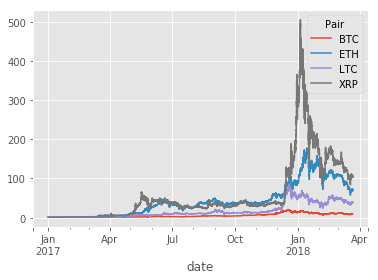

In [15]:
df.xs('open', level='Price', axis=1).head()
test = df.xs('open', level='Price', axis=1) / \
df.xs('open', level='Price', axis=1).iloc[0]
test.plot()